### Indonesian Doctor Review Sentiment Analysis
#### This notebook is a sentiment analysis on various doctor reviews (In Indonesian) that mostly revolve around after appointing with the doctor, and also some about HIV consultations. The reviews only range from either a positive (1) review, or a negative (0) review.

#### We prepare the relevant libraries first. Tensorflow will be our focus point. The Tokenizer extension from TensorFlow will be the main driving force of the Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

### Read the data
##### Read the data using pandas, encode in latin1. We can use the df.head() function to get some info of the top dataset.

In [2]:
#read and load the dataset
df = pd.read_csv('doctorReviewsIndo.csv', encoding='latin1', delimiter=';')
df.head()

,reviews,labels,tag
0,Dia menjelaskan bahwa dibutuhkan 4-5 kali pera...,0,negative
1,"dr yang hebat, dia merekomendasikan lebih sedi...",1,positive
2,Dokter datang dan menghabiskan 9 detik dan mer...,0,negative
3,Saya benar-benar puas dengan konsultasi yang s...,1,positive
4,pengalaman saya menyenangkan. dokternya tenan...,1,positive


##### df.info() to get some info and the data type of our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  156 non-null    object
 1   labels   156 non-null    int64 
 2   tag      156 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


In [4]:
print(df.labels.value_counts(normalize=True).sort_index())

0    0.49359
1    0.50641
Name: labels, dtype: float64


### Plotting the shape
##### Here we can plot the shape of the dataset to get a visualization of it.

<Axes: >

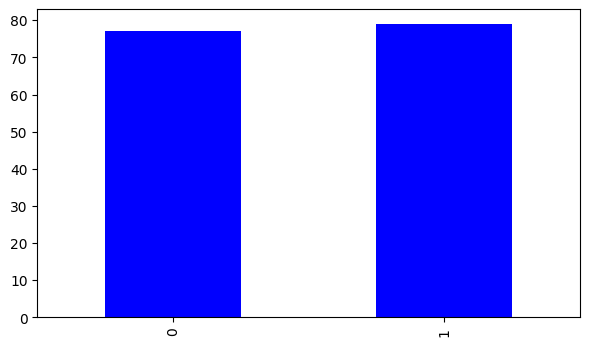

In [5]:
#print the shape of the dataset
df.labels.value_counts().sort_index().plot(kind='bar', color='blue',figsize=(7,4))

### Extracting, Splitting, and Transforming our reviews.
##### Here we split our dataset of reviews, labels, tags into strings. We convert the strings in review into lowercase for easier extraction

In [6]:
# Extract the reviews, labels, and tags
reviews = df['reviews'].values
labels = df['labels'].values
tags = df['tag'].values

#Perform text preprocessing, such as converting to lowercase
reviews = [str(review).lower() for review in reviews]

### Tokenization
##### Here the Tokenizer object is created. Then, the fit_on_texts() method is called to fit the tokenizer on the reviews data. This step is necessary to build the vocabulary and create word indices. After that, the texts_to_sequences() method is used to convert the reviews into sequences of integers based on the learned word indices. Finally, the first sequence is printed to see the result.

In [7]:
#Tokenize the reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
#print to check tokenization
print(sequences[0])

[7, 23, 37, 463, 317, 191, 81, 29, 2, 239, 102, 91, 192, 130, 464, 193, 41, 239, 29, 3, 465, 466, 467, 193, 468, 13, 82]


### Padding the Sequences
##### The purpose of padding sequences is to create input sequences of equal length, which is important for efficient computation and consistency in model training. By padding shorter sequences with zeros or any other specified value, you ensure that all sequences have the same length, regardless of their original lengths.
##### In the code , the maxlen parameter of the pad_sequences function is set to max_sequence_length to ensure all sequences have the same length. The sequences are padded with zeros at the end to match the maximum sequence length. Finally, the first padded sequence is printed to verify the result.

In [8]:
#Pad the sequences to ensure equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
#test the padded sequences
padded_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### One Hot Encoding and Splitting
##### Here we conver the columns into arrays to compute in our machine learning model

In [9]:
#split and convert the data into tags and labels
labels = np.array(labels)
tags = np.array(tags)

print("Label Array")
print("------------")
print(labels)

print("tags Array")
print("------------")
print(tags)

Label Array
------------
[0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1
 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0
 1 0 0 1 1 0 1 0]
tags Array
------------
['negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negati

### One Hot Encoding the tag column from strings to binary

In [10]:
#converting the tags column to one hot encoding to avoid nan values
df['tag'] = df['tag'].apply(lambda x: 1 if x == 'positive' else 0)
#print tag column for testing
df['tag']

0      0
1      1
2      0
3      1
4      1
      ..
151    1
152    1
153    0
154    1
155    0
Name: tag, Length: 156, dtype: int64

### Splitting the Dataset
##### Here we split our dataset with a ratio of 0.7 (e.g., 70% for training, 30% for testing)

In [11]:
#Set the ratio for splitting the dataset (e.g., 80% for training, 20% for testing)
split_ratio = 0.7
split_index = int(len(padded_sequences) * split_ratio)

train_data = padded_sequences[:split_index]
train_labels = labels[:split_index]
train_tags = tags[:split_index]

test_data = padded_sequences[split_index:]
test_labels = labels[split_index:]
test_tags = tags[split_index:]

In [12]:
train_data

array([[  0,   0,   0, ..., 468,  13,  82],
       [  0,   0,   0, ...,   2,  39, 469],
       [  0,   0,   0, ...,  71, 132,  52],
       ...,
       [  0,   0,   0, ..., 122,   8, 909],
       [  0,   0,   0, ...,  39, 914,  62],
       [  0,   0,   0, ..., 102,  13,  82]], dtype=int32)

In [13]:
test_data

array([[   0,    0,    0, ...,  931,    4,   45],
       [   0,    0,    0, ...,  934,   71,    5],
       [   0,    0,    0, ...,    6,   56,  946],
       ...,
       [   0,    0,    0, ...,   34,   27,   50],
       [   0,    0,    0, ...,    2,   31,   67],
       [   0,    0,    0, ...,  123,  116, 1066]], dtype=int32)

### Constructing the model architecture.
##### Embedding Layer: Maps words in the input sequence to dense vectors.
Dropout Layer: Randomly drops a fraction of input units to prevent overfitting.
Conv1D Layer: Learns patterns or features from the input sequence.
GlobalMaxPooling1D Layer: Extracts important features regardless of their position.
Dense Layer: Applies a linear transformation with ReLU activation.
Dense Output Layer: Produces a probability score for sentiment polarity.
The model uses binary cross-entropy loss and the RMSprop optimizer. It combines convolutional and pooling operations to capture local patterns and global information, while dense layers add complexity and dropout prevents overfitting. Overall, the model performs sentiment analysis on text data.

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=max_sequence_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])


### Shape of the Model

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 214, 16)           17072     
                                                                 
 dropout_1 (Dropout)         (None, 214, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 212, 32)           1568      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                      

### Train the model

In [28]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
4/4 [==============================] - 1s 94ms/step - loss: 0.7273 - accuracy: 0.4679 - val_loss: 0.7249 - val_accuracy: 0.5106
Epoch 2/50
4/4 [==============================] - 0s 30ms/step - loss: 0.7222 - accuracy: 0.5596 - val_loss: 0.7222 - val_accuracy: 0.6170
Epoch 3/50
4/4 [==============================] - 0s 23ms/step - loss: 0.7185 - accuracy: 0.6881 - val_loss: 0.7202 - val_accuracy: 0.7021
Epoch 4/50
4/4 [==============================] - 0s 28ms/step - loss: 0.7132 - accuracy: 0.8073 - val_loss: 0.7185 - val_accuracy: 0.6809
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.7091 - accuracy: 0.8349 - val_loss: 0.7162 - val_accuracy: 0.6383
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.7039 - accuracy: 0.8624 - val_loss: 0.7135 - val_accuracy: 0.6809
Epoch 7/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6985 - accuracy: 0.8991 - val_loss: 0.7105 - val_accuracy: 0.7872
Epoch 8/50
4/4 [===========

### Printing the Loss and Accuracy of the Model

In [29]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


2/2 [==============================] - 0s 12ms/step - loss: 0.4093 - accuracy: 0.7872
Test Loss: 0.4093
Test Accuracy: 0.7872


### Plotting our model training and testing history

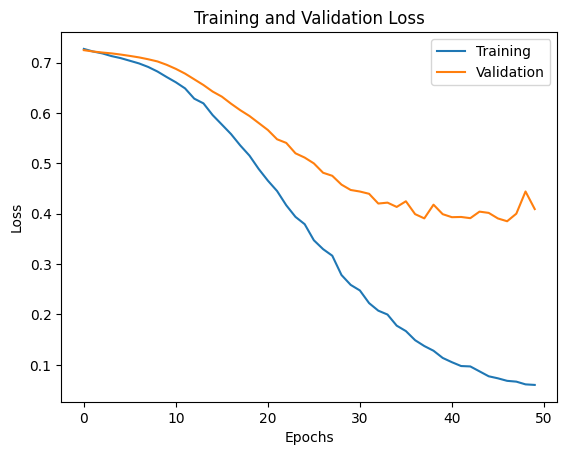

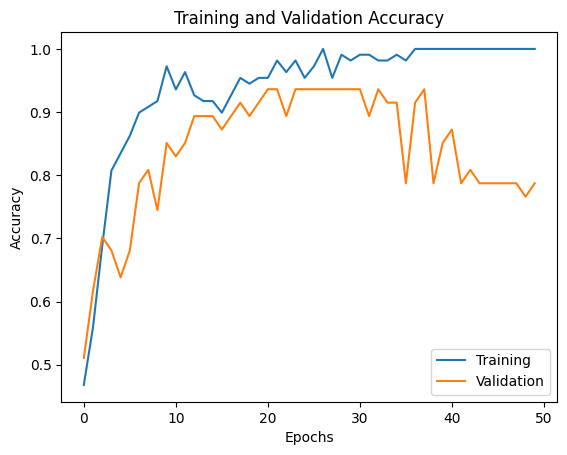

In [30]:
#Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

#Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

### Predicting and Testing the model.

In [25]:
#predicting and testing the model
input_text = "dokter ini sudah bagus dalam menyediakan saran"

input_tokens = tokenizer.texts_to_sequences([input_text])
input_sequence = pad_sequences(input_tokens, maxlen=max_sequence_length)
predictions = model.predict(input_sequence)
predicted_label = "Positive" if predictions[0] > 0.5 else "Negative"
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 38ms/step
Predicted Label: Positive


### Saving our Model for Deployment
##### This model will be saved and continued for deployment in docker. If I want to deploy your model to Docker, I have to save it in the HDF5 format (.h5) using the save() method.
##### The HDF5 format is a commonly used file format for storing deep learning models in TensorFlow.

In [20]:
model.save('doctor_review_nlp_model.h5')

### Downloading the Model from Google Colab


In [21]:
from google.colab import files
files.download('doctor_review_nlp_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>